In [6]:
#Standard includes
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
# Useful module for dealing with the Gaussian density
from scipy.stats import norm, multivariate_normal
# installing packages for interactive graphs
from IPython.display import display

In [7]:
# 'wine.data.txt' needs to be in the same directory
data = np.loadtxt(r'C:\Users\diego\Downloads\wine.data.txt', delimiter=',')
# Names of features
#print(data[0:10,:]) #Sí aparece la etiqueta con los valores de cada variable, que determinará el tipo de vino

featurenames= ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', 'Total phenols',
                'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                'OD280/OD315 of diluted wines', 'Proline']


In [8]:
np.random.seed(0) #The random numbers are exactly the same. If we choose a different seed, we get totally different random numbers.
                    #If you are writing unit tests (which we will describe tomorrow when we do test driven development),
                    #  it is often useful to seed the random number generator to get reproducible results.
perm = np.random.permutation(178)
#Split 178 instances into training set (trainx,trainy) of size 130 and test set (testx,testy) of size 48
#Also split apart data labels
trainx = data[perm[0:130],1:14] #Tomará las filas de la permutacion 0:130 y luego solamente las columnas de variables
trainy = data[perm[0:130],0] #Tomará las etiquetas sincronizado con el orden de trainx
testx = data[perm[131:178],1:14]# lo mismo pero para el test set
testy = data[perm[131:178],0] # lo mismo pero para el test set

In [9]:
print(sum(trainy==1),sum(trainy==2),sum(trainy==3))
print(sum(testy==1),sum(testy==2),sum(testy==3))


43 54 33
15 17 15


In [10]:
def density_plot(feature,label):
    plt.hist(trainx[trainy==label,feature], normed=True)
    mu=np.mean(trainx[trainy==label,feature])
    var = np.var(trainx[trainy==label,feature])
    std = np.sqrt(var)
    x_axis = np.linspace(mu-3*std,mu+3*std,1000)
    plt.plot(x_axis,norm.pdf(x_axis,mu,std),'r', lw=2)
    plt.title('Winery, Label: ' + str(label))
    plt.xlabel(featurenames[feature],fontsize=14,color='red')
    plt.ylabel('Density',fontsize=14,color='red')
    plt.show()

C:\Users\diego\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


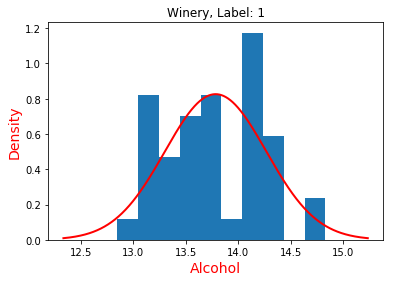

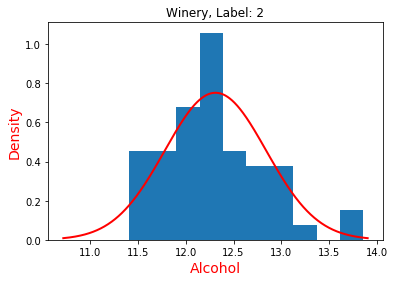

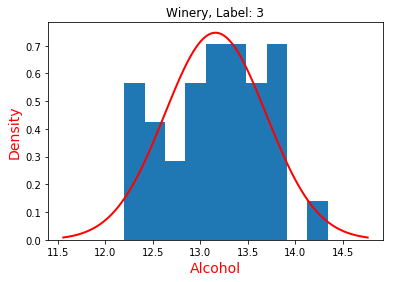

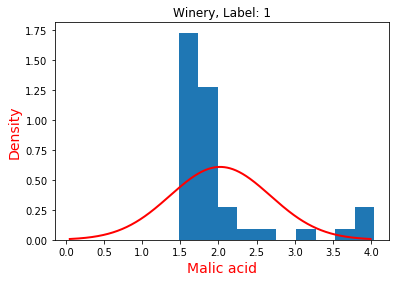

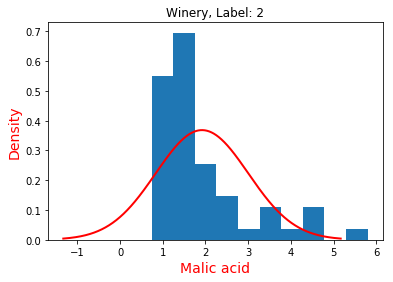

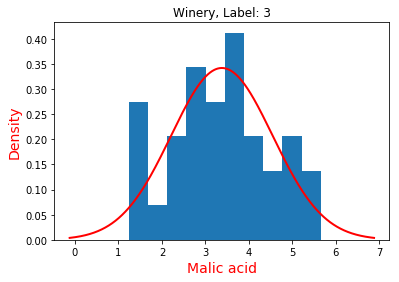

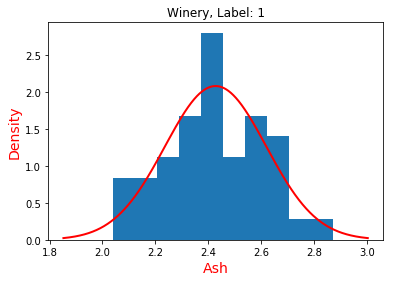

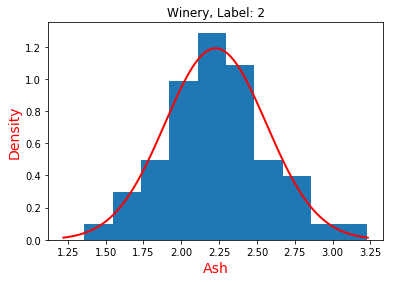

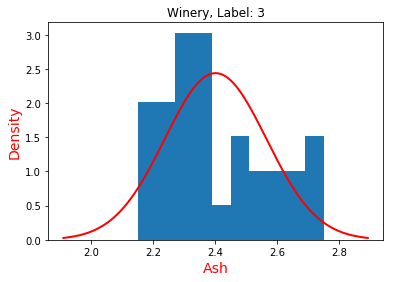

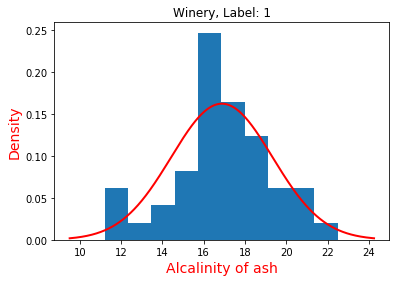

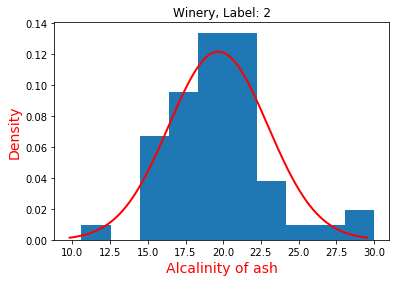

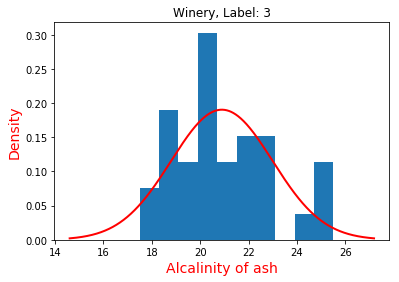

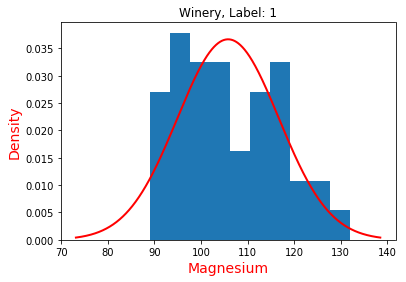

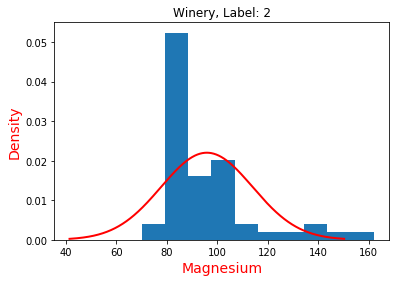

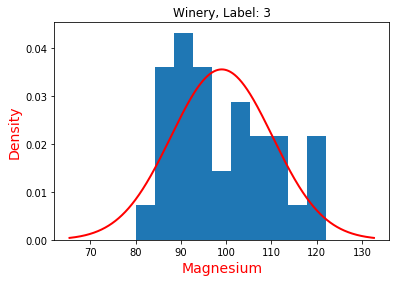

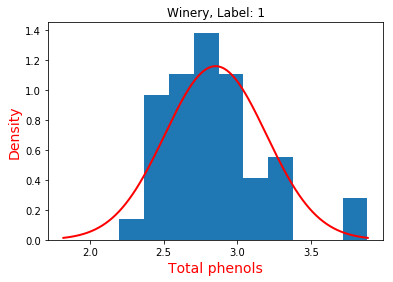

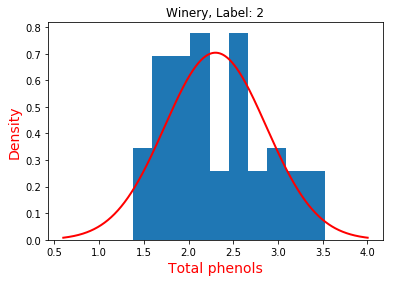

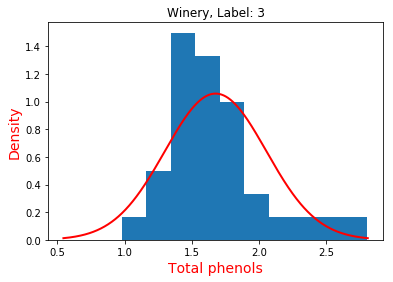

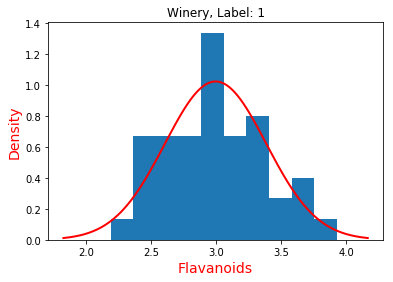

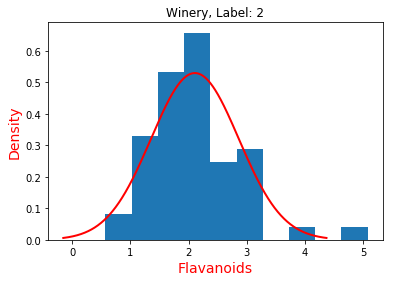

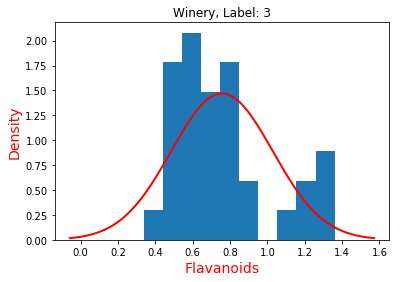

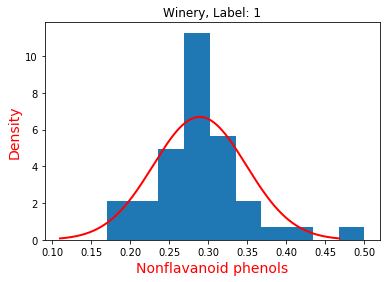

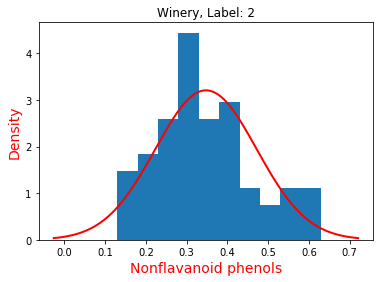

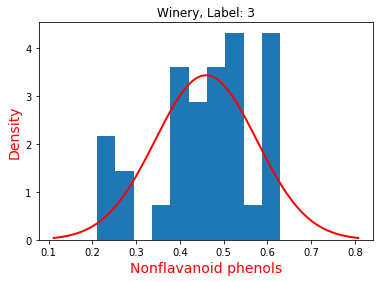

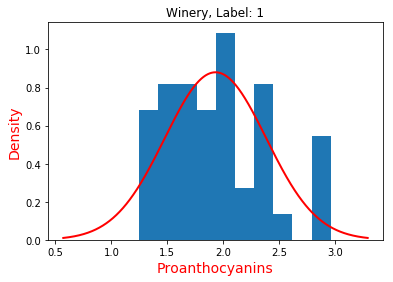

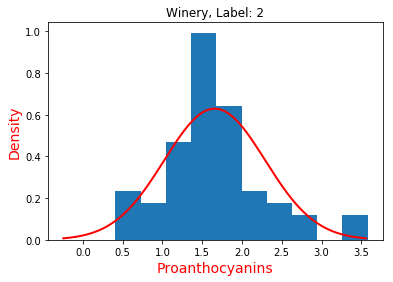

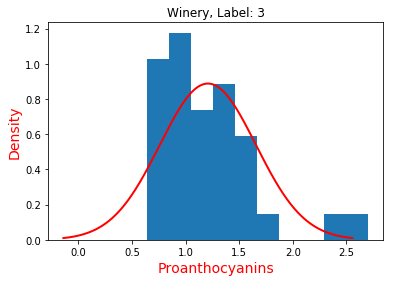

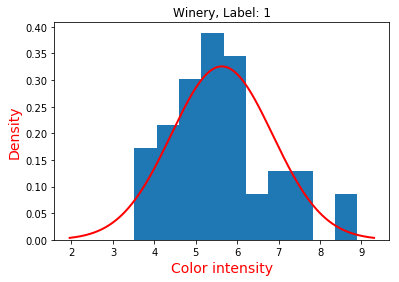

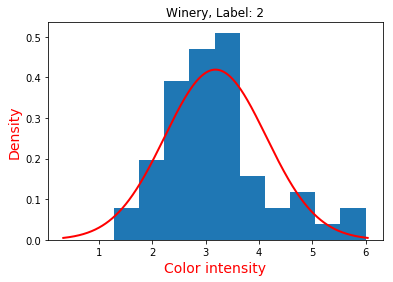

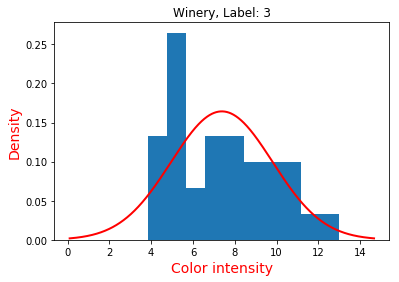

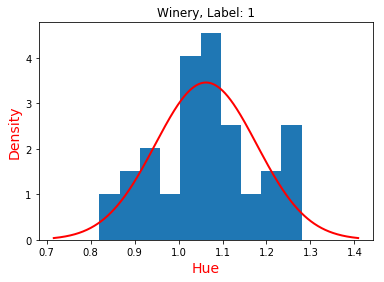

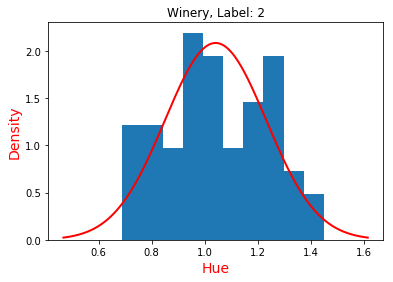

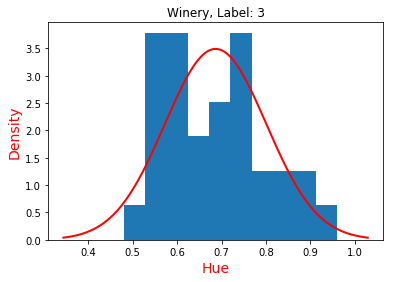

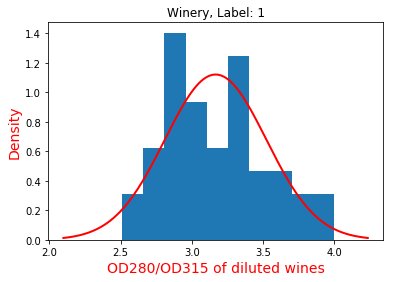

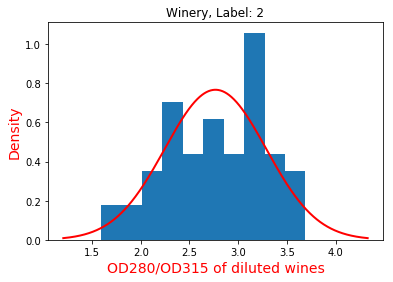

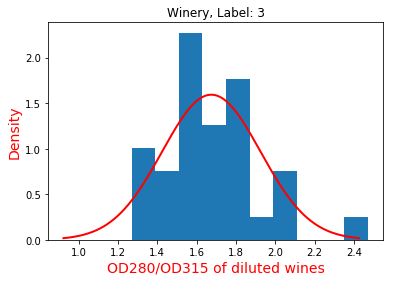

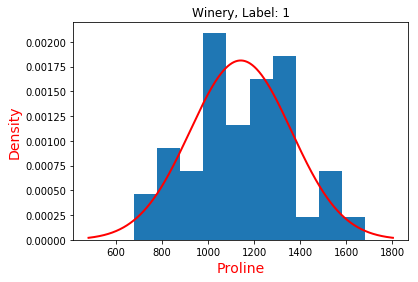

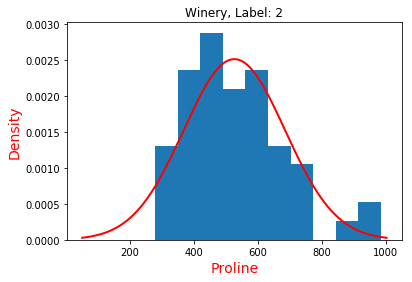

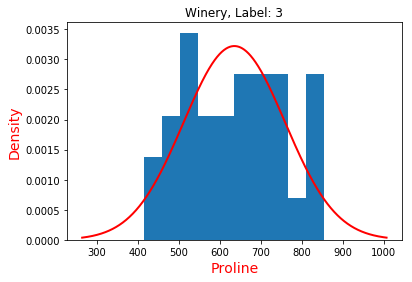

In [16]:
#All graphs
for feature in range(0,len(featurenames)):
    density_plot(feature,1)
    density_plot(feature, 2)
    density_plot(feature, 3)

In [12]:
def fit_generative_model(x,y,feature):
    k=3#number of classes
    mu =np.zeros(k+1) #lista de medias
    var = np.zeros(k+1)
    pi = np.zeros(k+1)
    for label in range(1,k+1):
        indices = (y==label)
        #print(indices)
        mu[label] = np.mean(x[indices,feature]) #sacar promedio de aquellas que Y==label y feature
        #print(mu[label])
        var[label]=np.var(x[indices,feature])
        #print(var[label])
        pi[label]=float(sum(indices)/float(len(y))) # es 40/130 lor ejemplo sumar los indices entre el total de indices
        #print(pi[label])
    return mu, var,pi

No handles with labels found to put in legend.


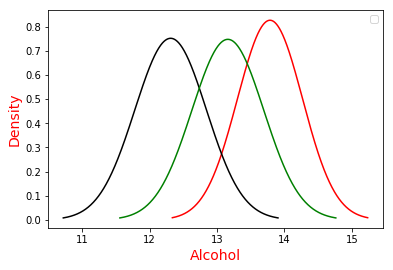

No handles with labels found to put in legend.


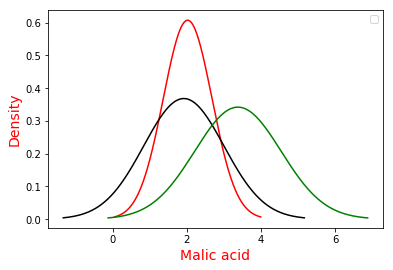

No handles with labels found to put in legend.


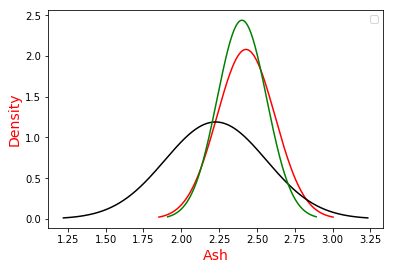

No handles with labels found to put in legend.


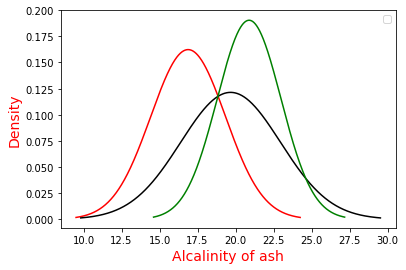

No handles with labels found to put in legend.


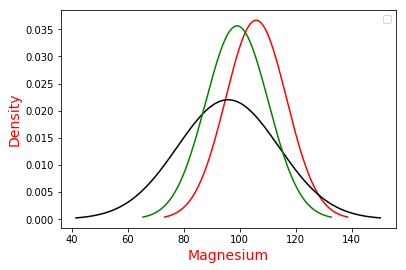

No handles with labels found to put in legend.


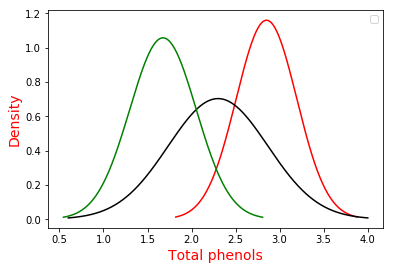

No handles with labels found to put in legend.


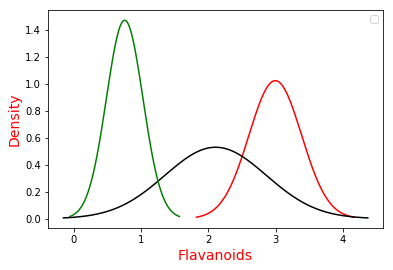

No handles with labels found to put in legend.


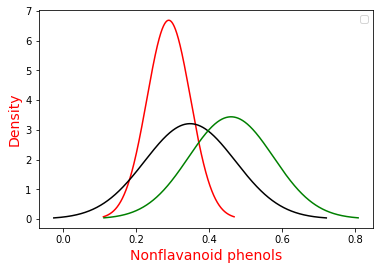

No handles with labels found to put in legend.


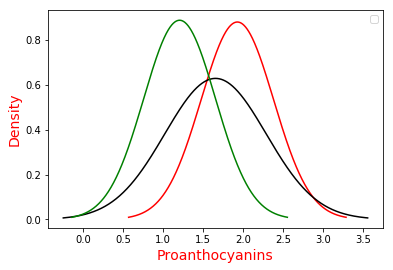

No handles with labels found to put in legend.


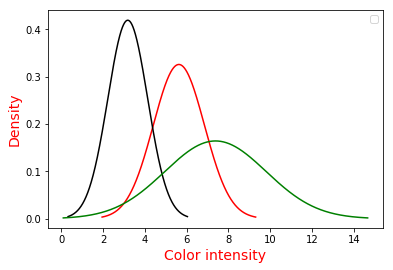

No handles with labels found to put in legend.


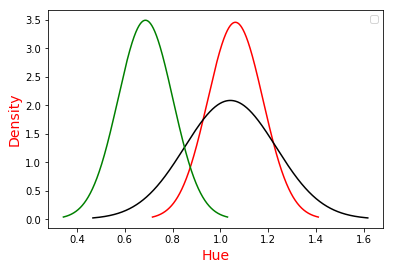

No handles with labels found to put in legend.


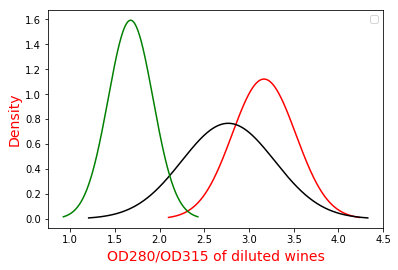

No handles with labels found to put in legend.


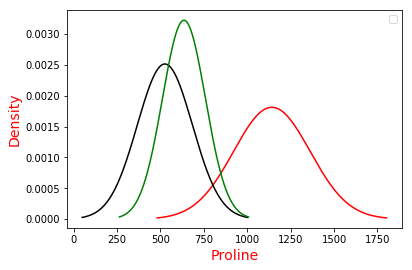

In [13]:
feature = 0 #'Alcohol'
mu,var,pi = fit_generative_model(trainx,trainy,feature)

k = 3 #clases

def show_densities(feature):
    mu, var, pi = fit_generative_model(trainx,trainy,feature)
    colors = ['r','k','g']
    for label in range(1,k+1):
        m = mu[label]
        s = np.sqrt(var[label])
        x_axis = np.linspace(m-3*s, m+3*s,1000)
        plt.plot(x_axis,norm.pdf(x_axis,m,s),colors[label-1])

    label = 'Class'+str(label)
    plt.xlabel(featurenames[feature],fontsize=14,color ='red')
    plt.ylabel('Density',fontsize=14,color='red')
    plt.legend()
    plt.show()

for n in range(0,len(featurenames)):
    show_densities(n)

In [14]:
def train_model(feature):
    mu,var,pi = fit_generative_model(trainx,trainy,feature)

    k=3
    n_train = len(trainy) #train points
    score1 = np.zeros((n_train, k+1))
    for i in range(0,n_train):
        for label in range(1,k+1):
            score1[i,label]=np.log(pi[label])+norm.logpdf(trainx[i,feature],mu[label],np.sqrt(var[label]))
    predictions1 = np.argmax(score1[:,1:4],axis=1)+1 # porque se clasifica con el que tenga el máximo numero
    errors1 = np.sum(predictions1 != trainy)
    print('Train error using feature'+ featurenames[feature] + ':' + str(errors1) + '/' + str(n_train))

print(train_model(0))

Train error using featureAlcohol:44/130
None


In [15]:
#Train vs test
def test_model(feature):
    mu, var, pi = fit_generative_model(trainx, trainy, feature)

    k = 3 # Labels 1,2,...,k
    n_test = len(testy) # Number of test points
    score = np.zeros((n_test,k+1))
    for i in range(0,n_test):
        for label in range(1,k+1):
            score[i,label] = np.log(pi[label]) + \
            norm.logpdf(testx[i,feature], mu[label], np.sqrt(var[label]))
    predictions = np.argmax(score[:,1:4], axis=1) + 1
    # Finally, tally up score
    errors = np.sum(predictions != testy)
    print ("Test error using feature " + featurenames[feature] + ": " + str(errors) + "/" + str(n_test))
for feat in range(0,len(featurenames)):
    print(test_model(feat))


Test error using feature Alcohol: 17/47
None
Test error using feature Malic acid: 23/47
None
Test error using feature Ash: 29/47
None
Test error using feature Alcalinity of ash: 23/47
None
Test error using feature Magnesium: 21/47
None
Test error using feature Total phenols: 16/47
None
Test error using feature Flavanoids: 8/47
None
Test error using feature Nonflavanoid phenols: 22/47
None
Test error using feature Proanthocyanins: 15/47
None
Test error using feature Color intensity: 10/47
None
Test error using feature Hue: 13/47
None
Test error using feature OD280/OD315 of diluted wines: 19/47
None
Test error using feature Proline: 17/47
None


Lowest test error with classifier: Flavanoids